In [33]:
%matplotlib inline

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [35]:
benin_df = pd.read_csv("../cleaned data/cleaned-benin-malanville.csv")
sierraleone_df=pd.read_csv("../cleaned data/cleaned-sierraleone-bumbuna.csv")
togo_df = pd.read_csv("../cleaned data/cleaned-togo-dapaong_qc.csv")

#### Add 'Country' column to each DataFrame

In [36]:

benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

####  Combine the DataFrames

In [37]:
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

#### Filter out negative or zero values for GHI, DNI, DHI

In [38]:
combined_df = combined_df[(combined_df['GHI'] > 0) & (combined_df['DNI'] > 0) & (combined_df['DHI'] > 0)]

In [39]:
# Compute summary statistics (mean, median, std) for GHI, DNI, DHI by country
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Flatten the multi-index columns for better readability
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats = summary_stats.reset_index()

# Display the summary table
print("Summary Table of GHI, DNI, DHI by Country:")
display(summary_stats)

Summary Table of GHI, DNI, DHI by Country:


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,515.57,518.9,300.96,364.44,367.5,278.69,244.52,227.7,135.03
1,Sierra Leone,433.74,398.3,272.02,244.80,165.6,245.62,253.56,247.3,132.77
2,Togo,523.63,526.9,292.51,357.11,351.7,270.86,252.75,238.9,134.70


C:\Users\micha\AppData\Local\Temp\ipykernel_13400\2431909306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, ax=ax, palette='Set2')
C:\Users\micha\AppData\Local\Temp\ipykernel_13400\2431909306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, ax=ax, palette='Set2')
C:\Users\micha\AppData\Local\Temp\ipykernel_13400\2431909306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, ax=ax, palette='Set2')


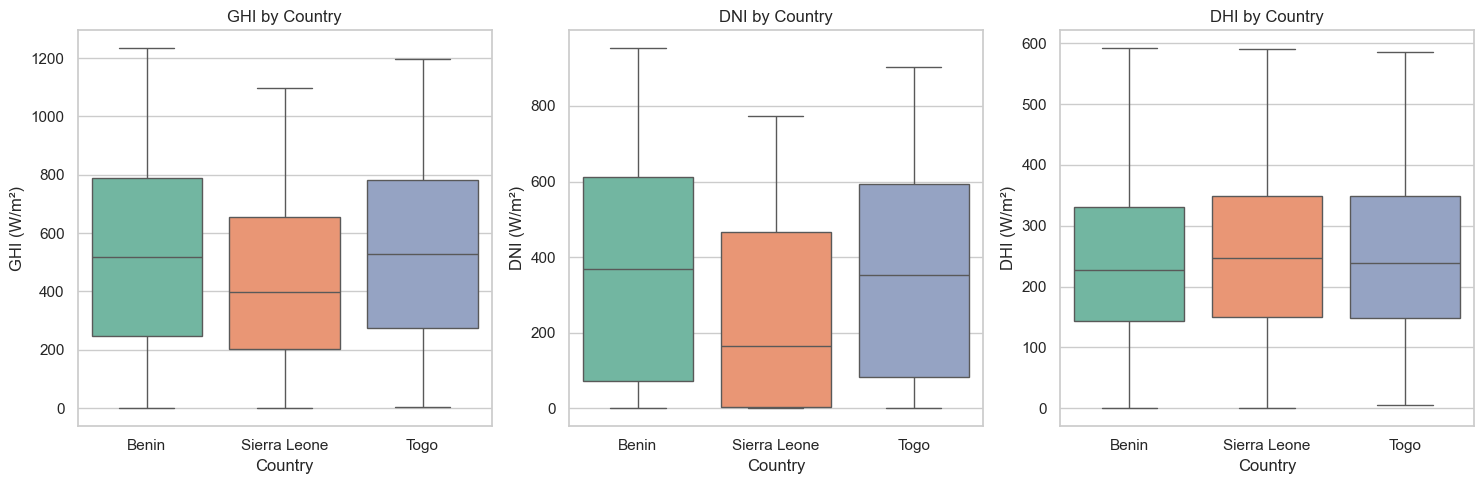

In [47]:
# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, metric in zip(axes, ['GHI', 'DNI', 'DHI']):
    sns.boxplot(x='Country', y=metric, data=combined_df, ax=ax, palette='Set2')
    ax.set_title(f'{metric} by Country')
    ax.set_ylabel(f'{metric} (W/m²)')

plt.tight_layout()
plt.show()